<a href="https://colab.research.google.com/github/kimhwijin/korean_food_classifier/blob/master/korean_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -qq "drive/MyDrive/Datasets/kfood.zip"

In [2]:
!git clone https://github.com/kimhwijin/korean_food_classifier.git

Cloning into 'korean_food_classifier'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 114 (delta 48), reused 109 (delta 43), pack-reused 0
Receiving objects: 100% (114/114), 3.70 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [32]:
import sys
import os
sys.path.append(os.getcwd() + '/korean_food_classifier')

In [30]:
import kfood_dataset
paths = kfood_dataset.get_image_paths()
dataset = kfood_dataset.make_kfood_dataset(paths)

tf.Tensor(150507, shape=(), dtype=int64)


tf.Tensor([[63]], shape=(1, 1), dtype=int64)
tf.Tensor([[139]], shape=(1, 1), dtype=int64)
tf.Tensor([[66]], shape=(1, 1), dtype=int64)
tf.Tensor([[61]], shape=(1, 1), dtype=int64)


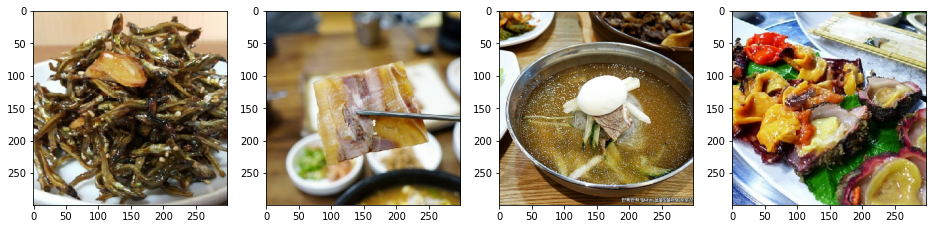

In [34]:
kfood_dataset.plot_dataset_image_4(dataset)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [36]:
inputs = keras.layers.Input(shape=[299, 299, 3])
inception_output = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights=None)(inputs)
z = keras.layers.GlobalAvgPool2D()(inception_output)
outputs = keras.layers.Dense(150, activation='softmax')(z)

model = keras.models.Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, None, None, 1536)  54336736 
 onal)                                                           
                                                                 
 global_average_pooling2d_2   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 150)               230550    
                                                                 
Total params: 54,567,286
Trainable params: 54,506,742
Non-trainable params: 60,544
_________________________________________________________________


In [37]:
import datetime
now = datetime.datetime.now()
model_name = 'InceptionResNetV2'
model_paths = 'drive/MyDrive/Model/kfood/{}/'.format(model_name)
if not os.path.exists(model_paths):
    os.mkdir(model_paths)


class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        fileformats = [now.year, now.month, now.day, now.hour, now.minute, epoch]
        self.model.save(model_paths + "{}_{}_{}_{}_{}_{}.hd5".format(*fileformats))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history = model.fit(dataset, epochs=100, callbacks=[CustomSaver()])

Epoch 1/100
